In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit import Aer,IBMQ
from qiskit import execute
from qiskit.tools import visualization
from qiskit.tools.visualization import circuit_drawer, plot_histogram
import matplotlib.pyplot as plt
from executeCircuit import execute_locally,extractClassical
from qEnvironments import quantum_sparse_sampling as qSS
import numpy as np
import operator

### stochastic-MDP with 4 states with 2 possible actions each 

![mdp](t.png)<br>
### The best action is action 1

In [2]:
states=4
actions=2
transition_kernel= np.zeros((states,actions),dtype=object)
steps = 1 


#probality, sprime, reward
transition_kernel[0][0] = [(0.9,1,10),(0.1,2,50)]
transition_kernel[0][1] = [(1,3,20)] 
for s in range(1,states):
    for a in range(actions):
        transition_kernel[s][a] = [(1,s,0)]

In [3]:
qGW = qSS(states=states,actions=actions,tKernel=transition_kernel,gamma=0.9,env="grid")
qGW.step(initState=0,horizon=steps)
    

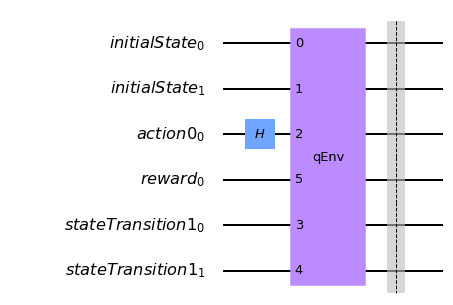

In [4]:
qGW.draw_circuit(decompose_circuit=False,mode="mpl")

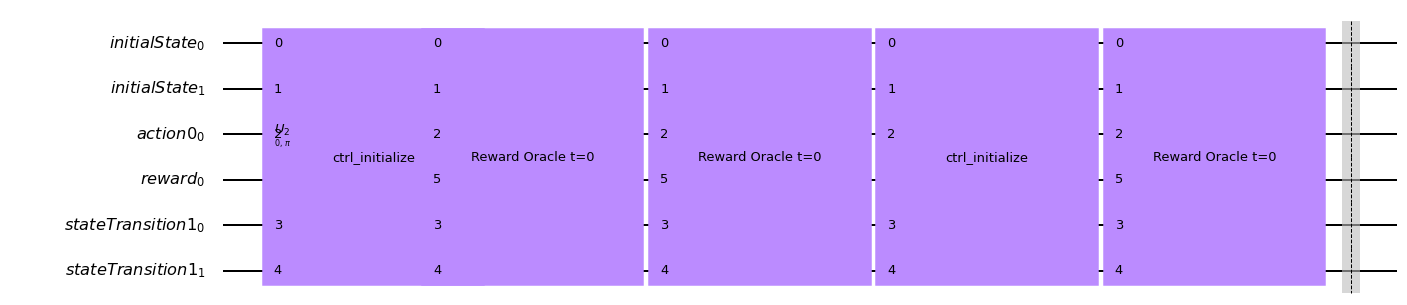

In [5]:
qGW.draw_circuit(decompose_circuit=True,layers=1,mode="mpl")

In [6]:
qGW.draw_circuit(decompose_circuit=True,layers=2,mode="text")

┌──────────────────┐┌───┐             »
    initialState_0: ─────────────────┤0                 ├┤ X ├──────■──────»
                                     │                  │├───┤      │      »
    initialState_1: ─────────────────┤1                 ├┤ X ├──────■──────»
                    ┌───────────────┐│                  │├───┤      │      »
         action0_0: ┤ U3(pi/2,0,pi) ├┤2                 ├┤ X ├──────■──────»
                    └───────────────┘│  Disentangler_dg │└───┘┌─────┴─────┐»
          reward_0: ─────────────────┤                  ├─────┤ Ry(pi/10) ├»
                                     │                  │     └─────┬─────┘»
stateTransition1_0: ─────────────────┤3                 ├───────────■──────»
                                     │                  │┌───┐      │      »
stateTransition1_1: ─────────────────┤4                 ├┤ X ├──────■──────»
                                     └──────────────────┘└───┘             »
«                    ┌───┐┌───┐            ┌───┐┌──────────────────┐┌───┐»
«    initialState_0: ┤ X ├┤ X ├─────■──────┤ X ├┤0                 ├┤ X ├»
«                    ├───┤├───┤     │      ├───┤│                  │├───┤»
«    initialState_1: ┤ X ├┤ X ├─────■──────┤ X ├┤1                 ├┤ X ├»
«                    ├───┤├───┤     │      ├───┤│                  │└───┘»
«         action0_0: ┤ X ├┤ X ├─────■──────┤ X ├┤2                 ├─────»
«                    └───┘└───┘┌────┴─────┐└───┘│  Disentangler_dg │     »
«          reward_0: ──────────┤ Ry(pi/2) ├─────┤                  ├─────»
«                    ┌───┐     └────┬─────┘┌───┐│                  │     »
«stateTransition1_0: ┤ X ├──────────■──────┤ X ├┤3                 ├─────»
«                    ├───┤          │      └───┘│                  │     »
«stateTransition1_1: ┤ X ├──────────■───────────┤4                 ├─────»
«                    └───┘                      └──────────────────┘     »
«                                ┌───┐ ░ 
«    initialState_0: ─────■──────┤ X ├─░─
«                         │      ├───┤ ░ 
«    initialState_1: ─────■──────┤ X ├─░─
«                         │      └───┘ ░ 
«         action0_0: ─────■────────────░─
«                    ┌────┴─────┐      ░ 
«          reward_0: ┤ Ry(pi/5) ├──────░─
«                    └────┬─────┘      ░ 
«stateTransition1_0: ─────■────────────░─
«                         │            ░ 
«stateTransition1_1: ─────■────────────░─
«                                      ░

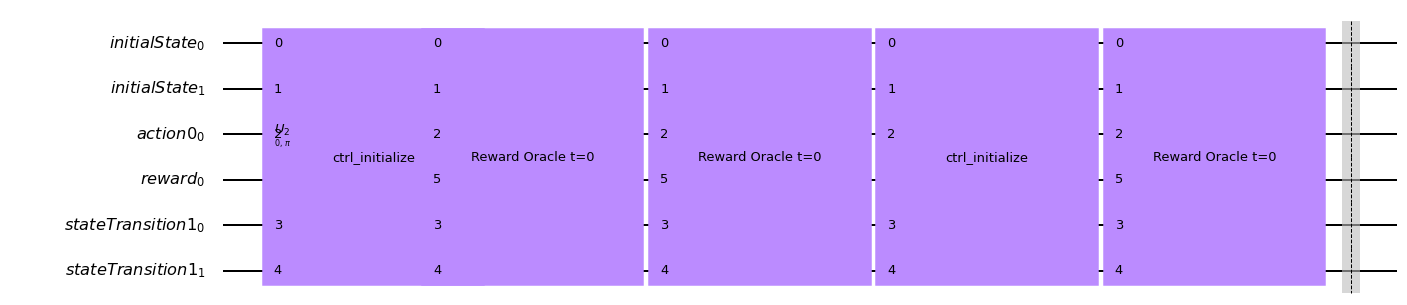

In [7]:
qGW.draw_circuit(decompose_circuit=True,layers=1,mode="mpl")


### Without amplification

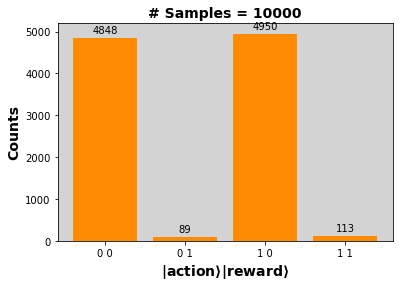

In [4]:
measurement, best_action = qGW.solve(shots=10000,amplify=False)


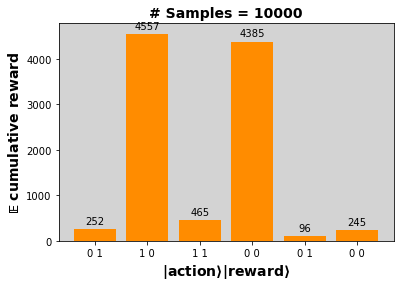

In [5]:
measurement, best_action = qGW.solve(shots=10000,amplify=False)

In [8]:
best_action

1

### Clearly the algorithm doesnt gave the correct action, and that is because of the value of the cosine term in the Ry gate that allmost maximizes the value of the reward. Given that we're interested in the sine terms, we can use a round of amplitude amplification to come up with the best solution for the problem.

### amplitude amplified

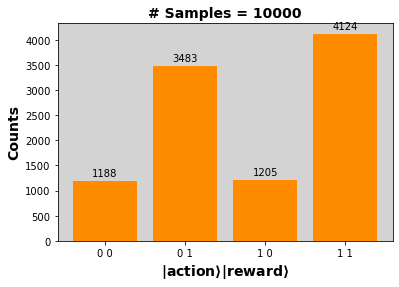

In [5]:
measurement, best_action = qGW.solve(shots=10000,algorithm="Exponential")

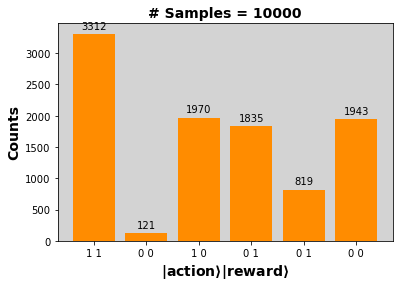

In [11]:
measurement, best_action = qGW.solve(shots=10000,algorithm="Exponential")

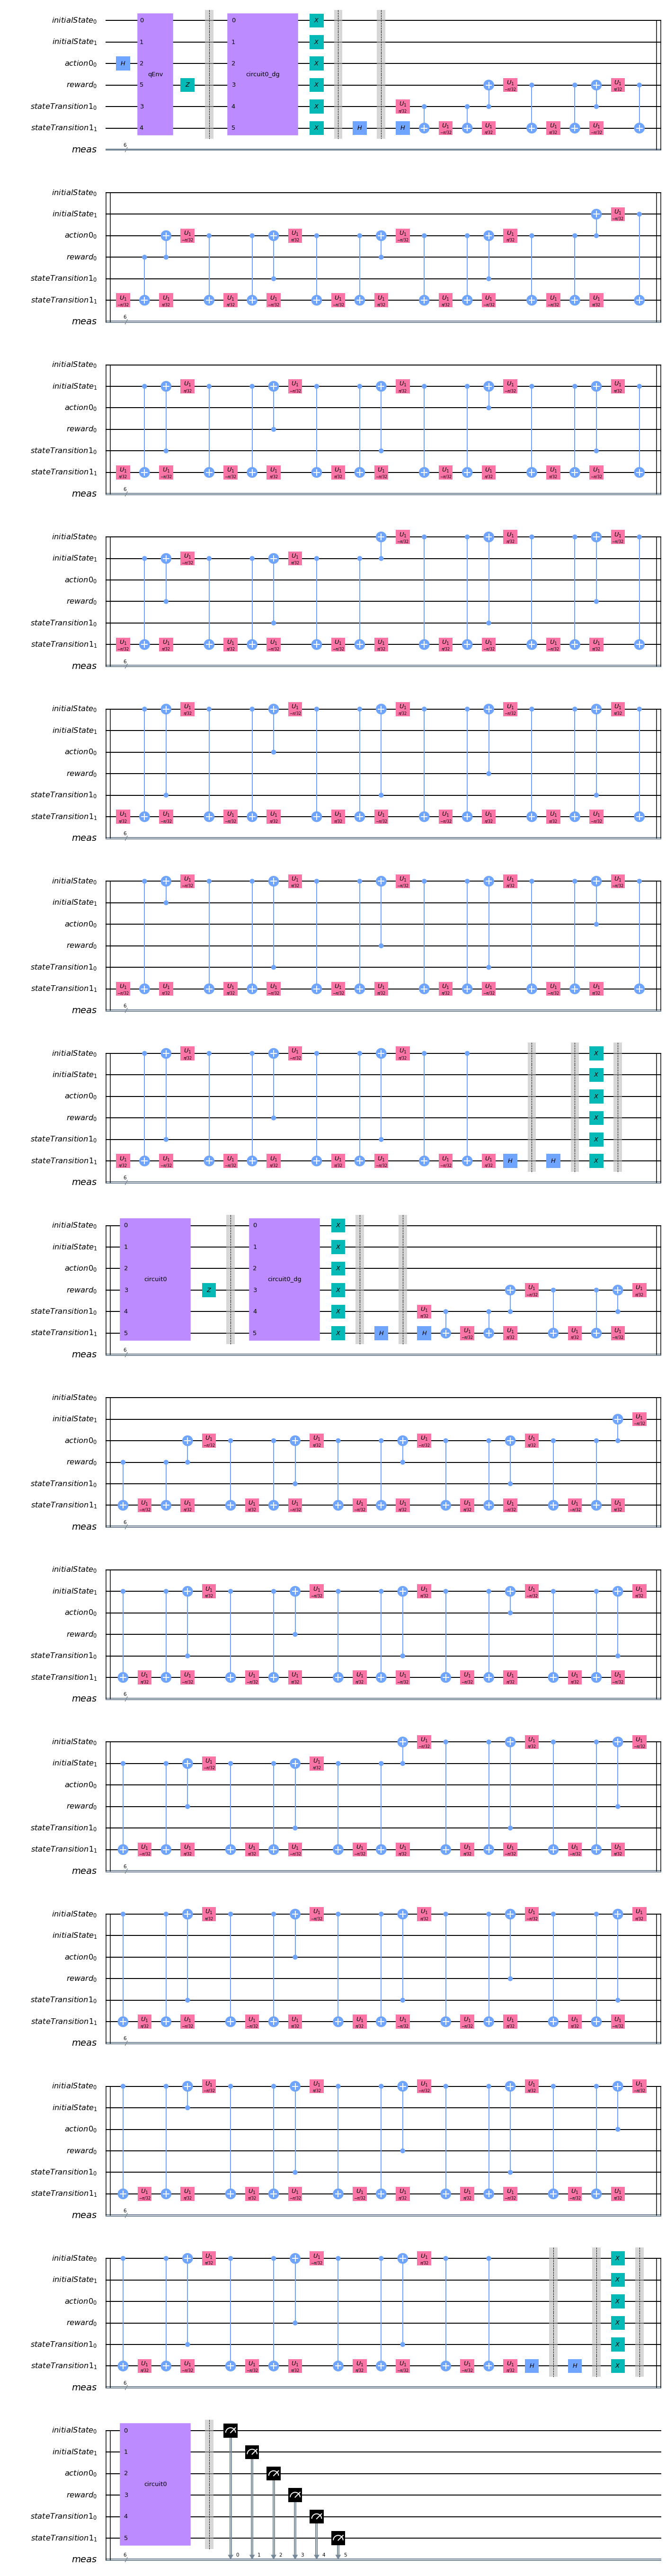

In [10]:
qGW.draw_circuit(mode="mpl")

### Now, the mdp above needed just one transition in superposition to solve for the best action to take in the state0. Suppose the same mdp but it a few more transitions

![img](mdp2_1.jpg)

### Tree and the expectation values 

![mdp](mdp2.jpg)

### The number of states and actions does not have changed
### With this mdp it suffices to take 2 transitions in superposition to see the entire mdp.
with a lookahead of 2, we hope that the quantum algorithm returns $\textbf{a0}$ as the best action to take in state s0

In [2]:
states=4
actions=2
transition_kernel= np.zeros((states,actions),dtype=object)
steps = 2


#probality, sprime, reward
transition_kernel[0][0] = [(0.9,1,10),(0.1,2,50)]
transition_kernel[0][1] = [(1,3,20)] 
transition_kernel[1][0] = [(0.9,0,50),(0.1,1,10)]
transition_kernel[1][1] = [(1,2,20)] 
transition_kernel[2][0] = [(1,2,20)] 
transition_kernel[2][1] = [(1,2,20)] 
transition_kernel[3][0] = [(1,3,10)] 
transition_kernel[3][1] = [(1,3,10)] 

In [3]:
qGW = qSS(states=states,actions=actions,tKernel=transition_kernel,gamma=0.9,env="grid")
qGW.step(initState=0,horizon=steps)

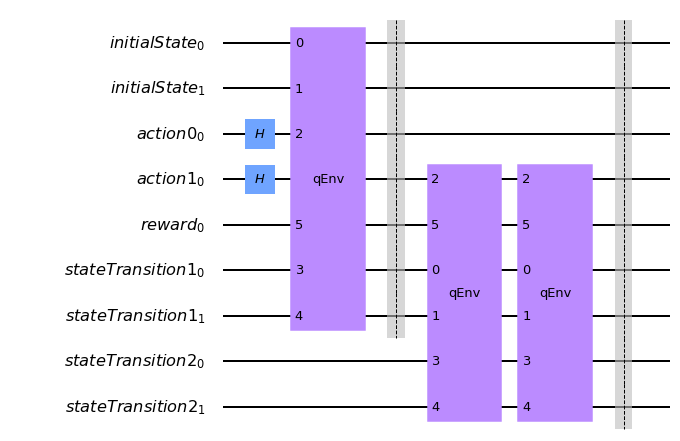

In [13]:
qGW.draw_circuit(decompose_circuit=False,mode="mpl")

In [14]:
qGW.draw_circuit(decompose_circuit=True,layers=2,mode="text")

┌──────────────────┐┌───┐             »
    initialState_0: ─────────────────┤0                 ├┤ X ├──────■──────»
                                     │                  │├───┤      │      »
    initialState_1: ─────────────────┤1                 ├┤ X ├──────■──────»
                    ┌───────────────┐│                  │├───┤      │      »
         action0_0: ┤ U3(pi/2,0,pi) ├┤2                 ├┤ X ├──────■──────»
                    ├───────────────┤│                  │└───┘      │      »
         action1_0: ┤ U3(pi/2,0,pi) ├┤  Disentangler_dg ├───────────┼──────»
                    └───────────────┘│                  │     ┌─────┴─────┐»
          reward_0: ─────────────────┤                  ├─────┤ Ry(pi/19) ├»
                                     │                  │     └─────┬─────┘»
stateTransition1_0: ─────────────────┤3                 ├───────────■──────»
                                     │                  │┌───┐      │      »
stateTransition1_1: ─────────────────┤4                 ├┤ X ├──────■──────»
                                     └──────────────────┘└───┘             »
stateTransition2_0: ───────────────────────────────────────────────────────»
                                                                           »
stateTransition2_1: ───────────────────────────────────────────────────────»
                                                                           »
«                    ┌───┐┌───┐               ┌───┐┌──────────────────┐┌───┐»
«    initialState_0: ┤ X ├┤ X ├───────■───────┤ X ├┤0                 ├┤ X ├»
«                    ├───┤├───┤       │       ├───┤│                  │├───┤»
«    initialState_1: ┤ X ├┤ X ├───────■───────┤ X ├┤1                 ├┤ X ├»
«                    ├───┤├───┤       │       ├───┤│                  │└───┘»
«         action0_0: ┤ X ├┤ X ├───────■───────┤ X ├┤2                 ├─────»
«                    └───┘└───┘       │       └───┘│                  │     »
«         action1_0: ─────────────────┼────────────┤  Disentangler_dg ├─────»
«                              ┌──────┴──────┐     │                  │     »
«          reward_0: ──────────┤ Ry(0.82673) ├─────┤                  ├─────»
«                    ┌───┐     └──────┬──────┘┌───┐│                  │     »
«stateTransition1_0: ┤ X ├────────────■───────┤ X ├┤3                 ├─────»
«                    ├───┤            │       └───┘│                  │     »
«stateTransition1_1: ┤ X ├────────────■────────────┤4                 ├─────»
«                    └───┘                         └──────────────────┘     »
«stateTransition2_0: ───────────────────────────────────────────────────────»
«                                                                           »
«stateTransition2_1: ───────────────────────────────────────────────────────»
«                                                                           »
«                                   ┌───┐ ░                          »
«    initialState_0: ───────■───────┤ X ├─░──────────────────────────»
«                           │       ├───┤ ░                          »
«    initialState_1: ───────■───────┤ X ├─░──────────────────────────»
«                           │       └───┘ ░                          »
«         action0_0: ───────■─────────────░──────────────────────────»
«                           │             ░ ┌──────────────────┐┌───┐»
«         action1_0: ───────┼─────────────░─┤2                 ├┤ X ├»
«                    ┌──────┴──────┐      ░ │                  │└───┘»
«          reward_0: ┤ Ry(0.33069) ├──────░─┤                  ├─────»
«                    └──────┬──────┘      ░ │                  │┌───┐»
«stateTransition1_0: ───────■─────────────░─┤0                 ├┤ X ├»
«                           │             ░ │  Disentangler_dg │├───┤»
«stateTransition1_1: ───────■─────────────░─┤1                 ├┤ X ├»
«                                         ░ │                  │└───┘»
«stateTransition2_0: ──────

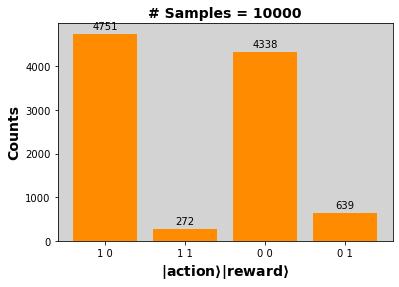

In [4]:
measurement, best_action = qGW.solve(shots=10000,amplify=False)

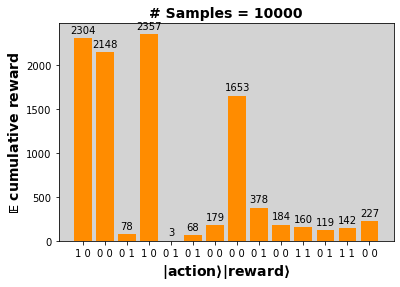

In [8]:
measurement, best_action = qGW.solve(shots=10000,amplify=False)

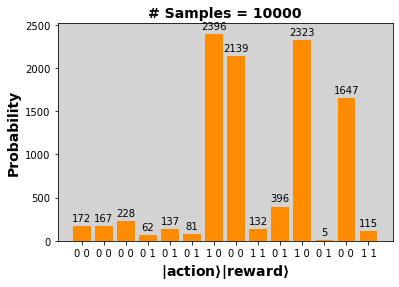

In [7]:
measurement, best_action = qGW.solve(shots=10000,amplify=False)

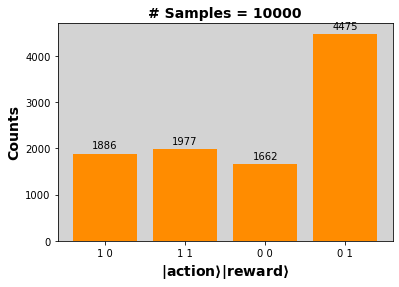

In [5]:
measurement, best_action = qGW.solve(shots=10000,algorithm="Exponential")

### Amplitude amplification and shots at random

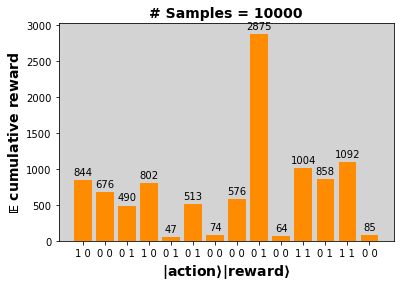

EPSILON BEST ACTION AT STATE S0 -  0
{'111101100': 844, '100101000': 676, '101011000': 490, '111100100': 802, '010110000': 47, '101010000': 513, '101000000': 74, '000100000': 576, '000110000': 2875, '101001000': 64, '111111100': 1004, '100111000': 858, '111110100': 1092, '010100000': 85}


In [9]:
measurement, epsilon_best_action = qGW.solve(shots=10000,amplify=True)

print("EPSILON BEST ACTION AT STATE S0 - ", epsilon_best_action)
print(measurement)

### We can calculate the expected number of samples in order to have an $\epsilon$-good estimate. By the wilson score interval we get that the # of samples needed:<br>
\begin{equation}
    k = {{\sigma^2}\over{8\epsilon^2}}\times log(|A|)[\sqrt{16\epsilon^2 + 1} + 1]
\end{equation}

$*$ $\sigma$ is the confidence value, that can be looked in tables, $\sigma = 2.58$ corresponds to a confidence of 99%.<br>
$*$ $\epsilon=0.01$ corresponds to 1% error in the estimates <br>
$*$ |A| = 2 <br>

so we find that we need $k = 16647.6 \approx 16648$ samples <br>

However this is for the worst case scenario, the case where we have all of our qubits in a uniform superposition state, given that using amplitude amplification we're not going to have a uniform superposition state most of the times, we define the average case sample complexity to be in $\Theta({k \over 2}) \approx  8324$

In [15]:
sigma = 2.58
epsilon = 0.01
k = ((sigma**2)/(8*(epsilon**2)))*(np.log2(actions))*(np.sqrt(16*(epsilon**2) + 1) + 1)
avg_k = k/2
avg_k = int(np.ceil(avg_k))

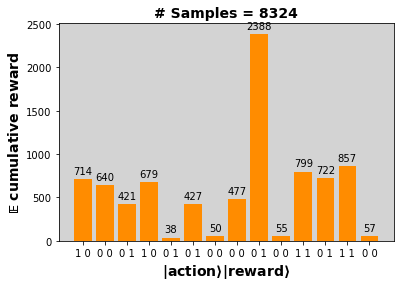

EPSILON BEST ACTION AT STATE S0 -  0


In [16]:
measurement, epsilon_best_action = qGW.solve(shots=avg_k,amplify=True)
print("EPSILON BEST ACTION AT STATE S0 - ", epsilon_best_action)

## MDP With 2 states and 2 actions <br>
### $S = \{S_1 , S_2\} \mapsto \{0,1\}$ & $A=\{'a','b'\} \mapsto \{0,1\}$

![mdp](mdp_2.jpg)

We can see that if we take action 'b' on state 0 and action 'a' on state 2 on expectation we get the highest reward possible.

In [22]:
states = 2
actions = 2
steps = 2

transition_kernel= np.zeros((states,actions),dtype=object)


#probality, sprime, reward
transition_kernel[0][0] = [(1,0,0)]
transition_kernel[0][1] = [(0.8,0,0),(0.2,1,2)]
transition_kernel[1][0] = [(1,1,2)]
transition_kernel[1][1] = [(1,0,1)] 

In [23]:
qMDP = qSS(states=states,actions=actions,tKernel=transition_kernel,gamma=0.9,env="grid")
qMDP.step(initState=0,horizon=steps)

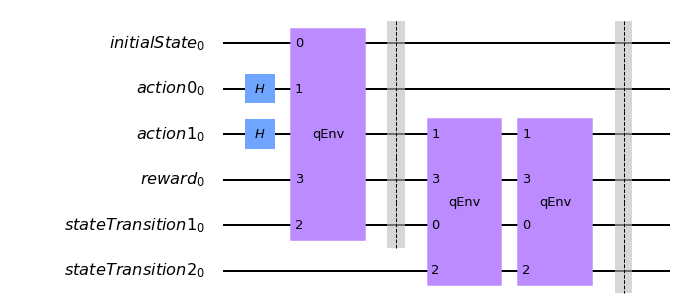

In [24]:
qMDP.draw_circuit(decompose_circuit=False,mode="mpl")

In [25]:
qMDP.draw_circuit(decompose_circuit=True,layers=2,mode="text")


┌──────────────────┐┌──────────────────┐»
    initialState_0: ─────────────────┤0                 ├┤0                 ├»
                    ┌───────────────┐│                  ││                  │»
         action0_0: ┤ U3(pi/2,0,pi) ├┤1                 ├┤1                 ├»
                    ├───────────────┤│                  ││                  │»
         action1_0: ┤ U3(pi/2,0,pi) ├┤  Disentangler_dg ├┤  Disentangler_dg ├»
                    └───────────────┘│                  ││                  │»
          reward_0: ─────────────────┤                  ├┤                  ├»
                                     │                  ││                  │»
stateTransition1_0: ─────────────────┤2                 ├┤2                 ├»
                                     └──────────────────┘└──────────────────┘»
stateTransition2_0: ─────────────────────────────────────────────────────────»
                                                                             »
«                    ┌───┐               ┌───┐ ░                     »
«    initialState_0: ┤ X ├───────■───────┤ X ├─░─────────────────────»
«                    └───┘       │       └───┘ ░                     »
«         action0_0: ────────────■─────────────░─────────────────────»
«                                │             ░ ┌──────────────────┐»
«         action1_0: ────────────┼─────────────░─┤1                 ├»
«                         ┌──────┴──────┐      ░ │                  │»
«          reward_0: ─────┤ Ry(0.82673) ├──────░─┤                  ├»
«                         └──────┬──────┘      ░ │  Disentangler_dg │»
«stateTransition1_0: ────────────■─────────────░─┤0                 ├»
«                                              ░ │                  │»
«stateTransition2_0: ────────────────────────────┤2                 ├»
«                                                └──────────────────┘»
«                                                                 »
«    initialState_0: ─────────────────────────────────────────────»
«                                                                 »
«         action0_0: ─────────────────────────────────────────────»
«                    ┌──────────────────┐                         »
«         action1_0: ┤1                 ├────────────■────────────»
«                    │                  │     ┌──────┴──────┐     »
«          reward_0: ┤                  ├─────┤ Ry(0.82673) ├─────»
«                    │  Disentangler_dg │┌───┐└──────┬──────┘┌───┐»
«stateTransition1_0: ┤0                 ├┤ X ├───────■───────┤ X ├»
«                    │                  │└───┘       │       └───┘»
«stateTransition2_0: ┤2                 ├────────────■────────────»
«                    └──────────────────┘                         »
«                                                                 »
«    initialState_0: ─────────────────────────────────────────────»
«                                                                 »
«         action0_0: ─────────────────────────────────────────────»
«                    ┌──────────────────┐┌───┐               ┌───┐»
«         action1_0: ┤1                 ├┤ X ├───────■───────┤ X ├»
«                    │                  │└───┘┌──────┴──────┐└───┘»
«          reward_0: ┤                  ├─────┤ Ry(0.74406) ├─────»
«                    │  Disentangler_dg │     └──────┬──────┘     »
«stateTransition1_0: ┤0                 ├────────────■────────────»
«                    │                  │            │            »
«stateTransition2_0: ┤2                 ├────────────■────────────»
«                    └──────────────────┘                         »
«                                                                  ░ 
«    initialState_0: ──────────────────────────────────────────────░─
«                                                                  ░ 
«         action0_0: ──────────────────────────────────────────────░─
«                    ┌─────────────────

### Shots at random 

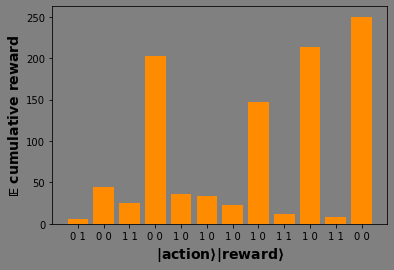

({'101100': 6,
  '100100': 44,
  '111010': 25,
  '000100': 203,
  '010110': 36,
  '100110': 33,
  '110010': 23,
  '000110': 147,
  '011110': 12,
  '000010': 213,
  '101110': 8,
  '000000': 250},
 0)

In [26]:
qMDP.solve(shots = 1000, amplify=False)

### shots at random with amplitude amplification

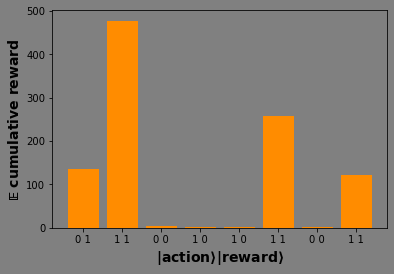

({'101100': 135,
  '111010': 477,
  '000100': 5,
  '100110': 2,
  '000110': 2,
  '011110': 257,
  '000000': 1,
  '101110': 121},
 1)

In [27]:
qMDP.solve(shots=1000,amplify=True)

### shots for $\epsilon$-good action estimate by Wilson score interval
k_avg

In [28]:
sigma = 2.58
epsilon = 0.01
k = ((sigma**2)/(8*(epsilon**2)))*(np.log2(actions))*(np.sqrt(16*(epsilon**2) + 1) + 1)
avg_k = int(np.ceil(k/2))
print(avg_k)

8324


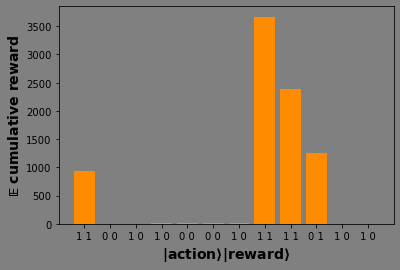

EPSILON BEST ACTION AT STATE S0 -  1


In [20]:
measurement, epsilon_best_action = qMDP.solve(shots=avg_k,amplify=True)
print("EPSILON BEST ACTION AT STATE S0 - ", epsilon_best_action)

In [22]:
measurement

{'000110': 199,
 '101100': 1397,
 '101110': 1116,
 '000100': 298,
 '111010': 2399,
 '000010': 284,
 '011110': 2180,
 '100100': 25,
 '100110': 34,
 '000000': 388,
 '010110': 4}

## Racing-Car - Pieter Abeel - CS188 Artificial Intelligence UC Berkeley <br>
![mdp](car_racing.png)<br>

### $S=\{cool,warm,overheated\} \mapsto \{0,1,2\}$
### $A=\{slow,fast\} \mapsto \{0,1\}$ 

In [2]:
states = 3
actions = 2
steps = 3

transition_kernel= np.zeros((states,actions),dtype=object)

#probality, sprime, reward
transition_kernel[0][0] = [(1,0,1)]
transition_kernel[0][1] = [(0.5,0,2),(0.5,1,2)]
transition_kernel[1][0] = [(0.5,0,1),(0.5,1,1)]
transition_kernel[1][1] = [(1,2,-1)] 
#state overheated is an absorving state, so in the quantum setting we leave the quantum agent in the same state with reward 0
transition_kernel[2][0] = [(1,2,0)] 
transition_kernel[2][1] = [(1,2,0)]  

In [3]:
qMDP = qSS(states=states,actions=actions,tKernel=transition_kernel,gamma=0.9,env="grid")
qMDP.step(initState=0,horizon=steps)

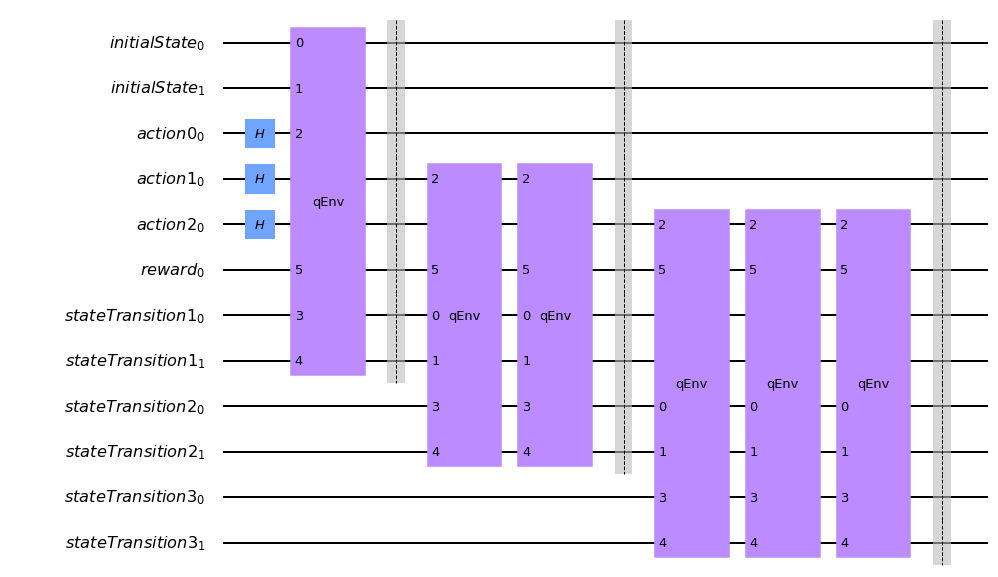

In [31]:
qMDP.draw_circuit(mode="mpl")

In [4]:
sigma = 2.58
epsilon = 0.01
k = ((sigma**2)/(8*(epsilon**2)))*(np.log2(actions))*(np.sqrt(16*(epsilon**2) + 1) + 1)
avg_k = int(np.ceil(k/2))
print(avg_k)

8324


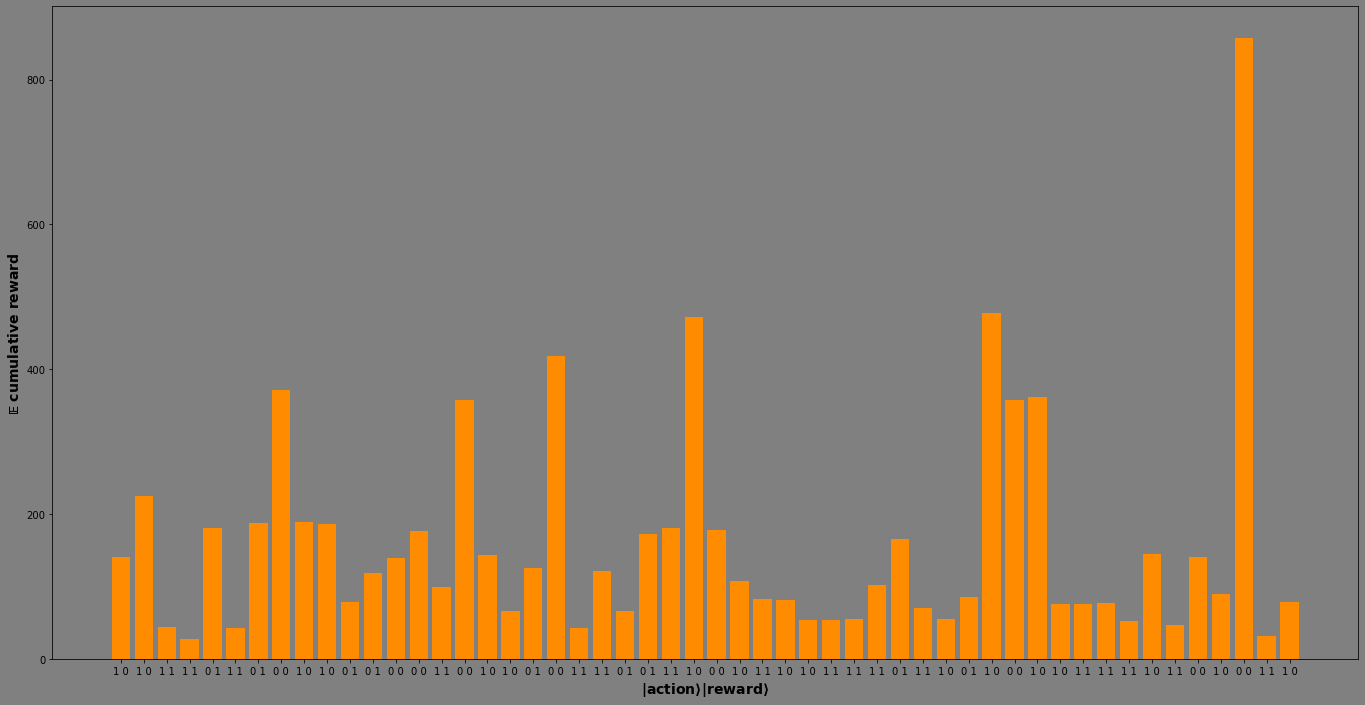

EPSILON BEST ACTION AT STATE S0 -  0


In [33]:
measurement, epsilon_best_action = qMDP.solve(shots=int(avg_k))
print("EPSILON BEST ACTION AT STATE S0 - ", epsilon_best_action)

EPSILON BEST ACTION AT STATE S0 -  0


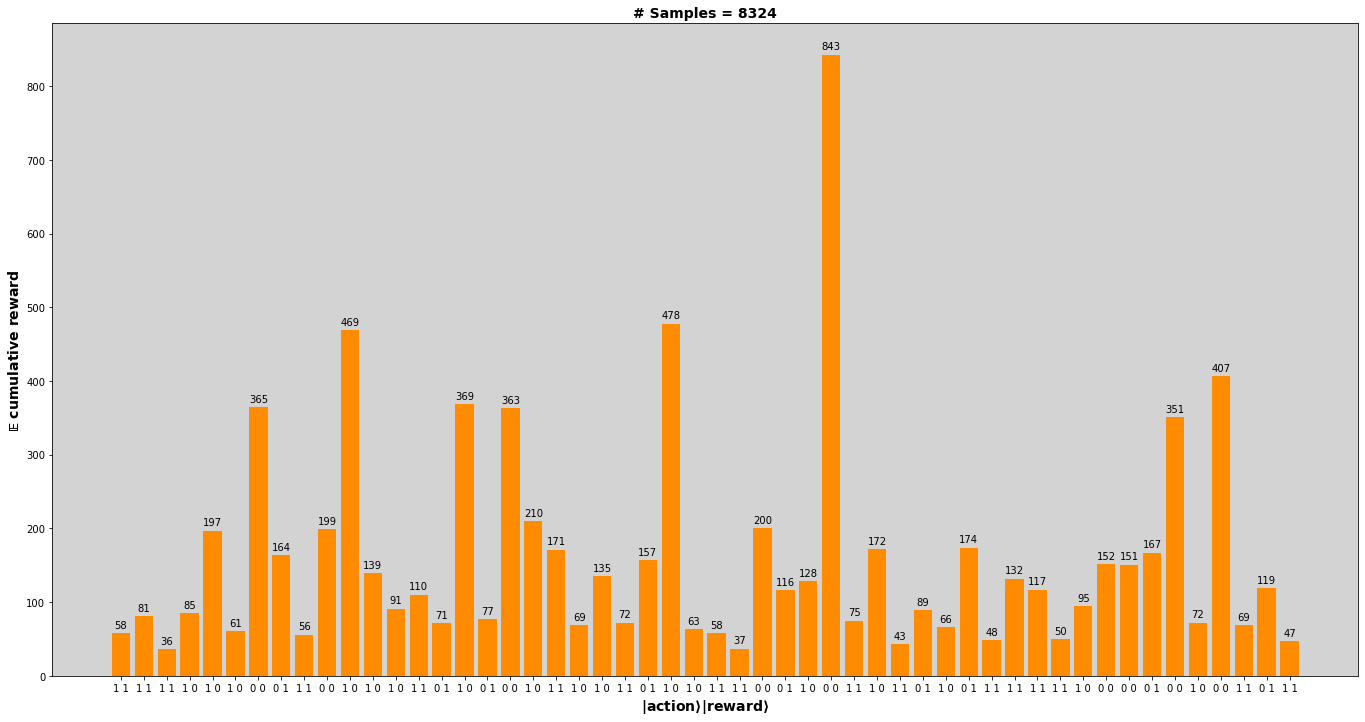

In [5]:
measurement, epsilon_best_action = qMDP.solve(shots=int(avg_k))
print("EPSILON BEST ACTION AT STATE S0 - ", epsilon_best_action)

In [7]:
measurement

{'100100111100': 197,
 '000000001000': 116,
 '000000111100': 120,
 '010001110100': 112,
 '000101100100': 91,
 '000000101100': 211,
 '010000110100': 216,
 '000001000100': 51,
 '010000110000': 413,
 '000000010000': 107,
 '010000011100': 11,
 '000100001100': 12,
 '000000011100': 9,
 '100101110100': 193,
 '101001101100': 319,
 '010101000100': 32,
 '010100101100': 106,
 '000100001000': 60,
 '010000111000': 229,
 '100100111000': 346,
 '000000110100': 215,
 '000100101000': 225,
 '010100001000': 45,
 '010101100100': 112,
 '010000010100': 42,
 '000000101000': 411,
 '000000010100': 37,
 '100101010100': 101,
 '101001001100': 210,
 '000000000100': 117,
 '000000111000': 231,
 '000000110000': 416,
 '000001100100': 201,
 '010000010000': 119,
 '000101000100': 30,
 '000100101100': 110,
 '000001110100': 124,
 '000000001100': 38,
 '000001010100': 20,
 '000000011000': 48,
 '000000100000': 747,
 '000000100100': 366,
 '100100011100': 73,
 '101001011100': 217,
 '010000111100': 104,
 '100100011000': 156,
 '01

### Reward Function normalized to be for T maximum reward transitions at $\pi \over 2$


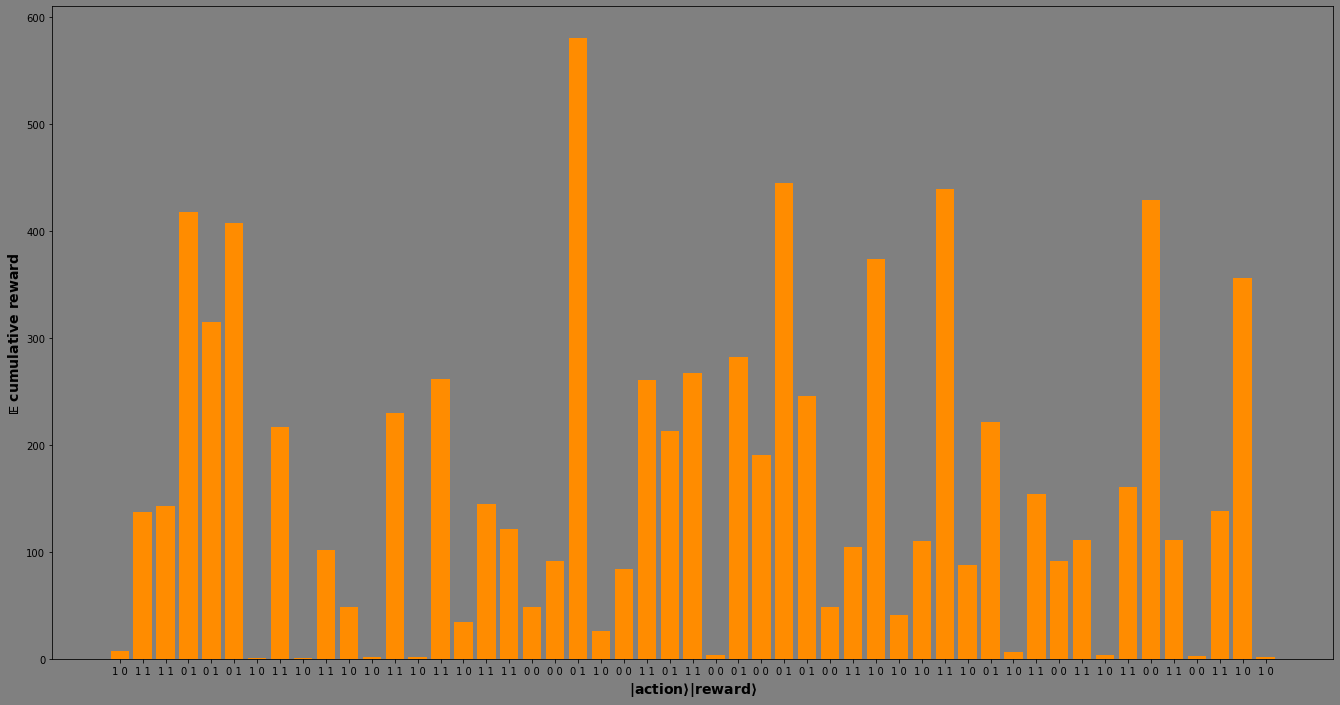

({'000100001100': 7,
  '010001110100': 137,
  '010100101100': 143,
  '000000101000': 418,
  '100100111000': 315,
  '010000110000': 408,
  '010100001100': 1,
  '100100111100': 217,
  '010001010100': 1,
  '010101100100': 102,
  '100100011100': 48,
  '000000011100': 2,
  '000001100100': 230,
  '010000011100': 2,
  '000000110100': 262,
  '010101000100': 34,
  '101001101100': 145,
  '000100101100': 121,
  '010100001000': 48,
  '000000001000': 91,
  '000000100000': 581,
  '000101000100': 26,
  '010000010000': 84,
  '010000110100': 261,
  '000100101000': 213,
  '000000101100': 267,
  '010000011000': 4,
  '000000111000': 282,
  '100100011000': 191,
  '000000110000': 445,
  '010000111000': 246,
  '000100001000': 48,
  '010000111100': 105,
  '101001011100': 374,
  '000001000100': 41,
  '100101010100': 110,
  '000000100100': 439,
  '000000000100': 88,
  '010100101000': 221,
  '000000001100': 6,
  '101001111100': 154,
  '000000010000': 91,
  '000001110100': 111,
  '010000010100': 4,
  '10010111010

In [11]:
qMDP.solve(shots=int(avg_k))

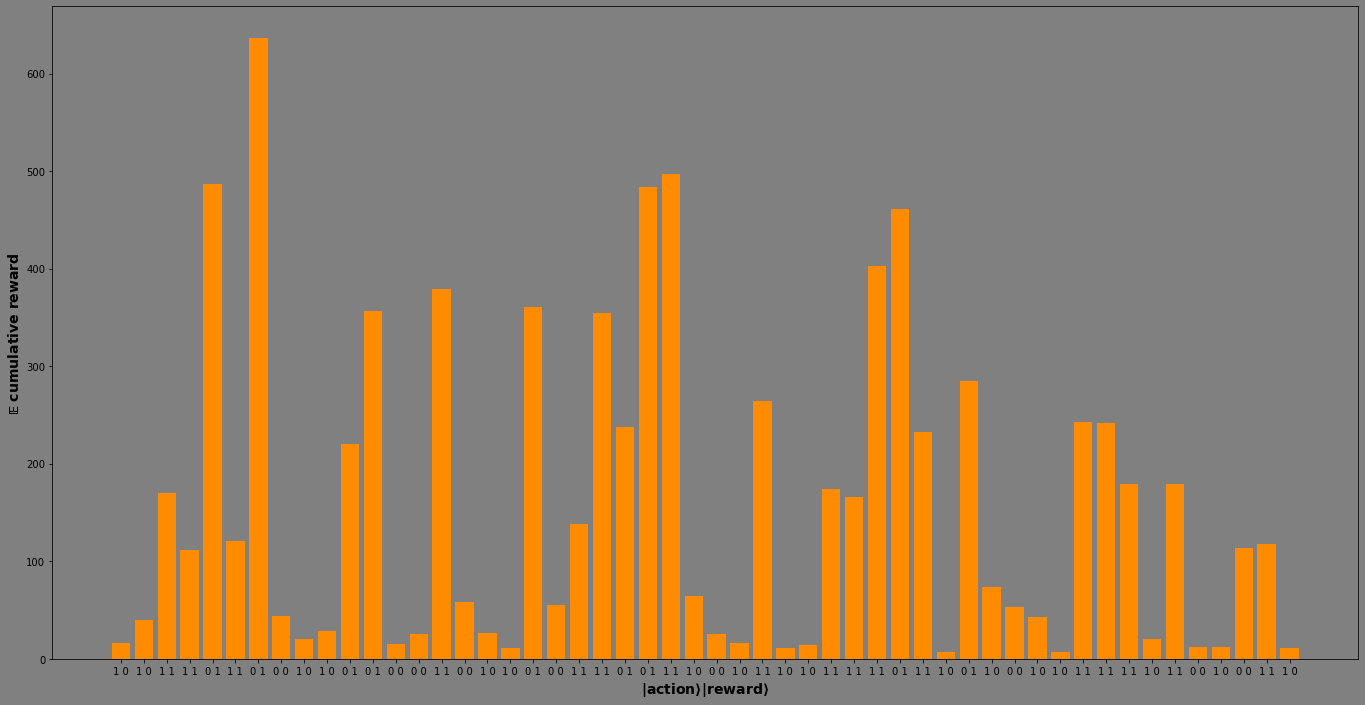

({'000000001100': 16,
  '100101010100': 40,
  '101001111100': 170,
  '000101100100': 112,
  '000000101000': 487,
  '100101110100': 121,
  '000000100000': 637,
  '000000001000': 44,
  '000001000100': 20,
  '100100011100': 28,
  '010100101000': 220,
  '010000111000': 357,
  '000000011000': 15,
  '010100001000': 25,
  '000000110100': 379,
  '000000010000': 58,
  '010000010100': 26,
  '000001010100': 11,
  '000000111000': 361,
  '100100011000': 55,
  '101001101100': 138,
  '000000101100': 355,
  '000100101000': 238,
  '010000110000': 484,
  '000000100100': 497,
  '101001001100': 64,
  '000100001000': 25,
  '000101000100': 16,
  '010000111100': 264,
  '000100001100': 11,
  '010000011100': 14,
  '000001110100': 174,
  '010100101100': 166,
  '010000110100': 403,
  '000000110000': 461,
  '000000111100': 233,
  '000000011100': 7,
  '100100111000': 285,
  '101001011100': 74,
  '010000010000': 53,
  '000000000100': 43,
  '010101000100': 7,
  '000001100100': 243,
  '100100111100': 242,
  '00010010

In [34]:
qMDP.solve(shots=int(avg_k),amplify=True)

# 2x2 Gridworld Environment - Q-Learning vs Quantum-Learning

<p align="center"> 
<img src="gw_2x2.png">
</p>

### $S=\{s0,s1,s2,s3\}\mapsto\{0,1,2,3\}$ & $A=\{UP,DOWN,LEFT,RIGHT\} \mapsto \{0,1,2,3\}$
### The agent starts in state s0 and tries to get to state s3. In state s2 theres a hole , if the agent gets there, the episode ends and the agent receives a negative reward.<br>

### The environment is stochastic in a sense that every action that the agent makes it has a 80% probability of resulting in the action that the agent wants to make and 20% probability of resulting in an orthogonal action, i.e, if the agent wants to go up, 80% of the time it will go up but 20% of the time it will go either left or right. This stochasticity can be viewed as the floor being wet, and the agent slips when trying to move


In [2]:
states = 4
actions = 4
tk = np.zeros((states,actions),dtype=object)

tk[0][0] = [(0.8,0,0),(0.10,1,0),(0.10,0,0)]
tk[0][1] = [(0.8,2,-1),(0.10,1,0),(0.10,0,0)]
tk[0][2] = [(0.8,0,0),(0.10,0,0),(0.10,2,-1)]
tk[0][3] = [(0.8,1,0),(0.10,0,0),(0.10,2,-1)]
tk[1][0] = [(0.8,1,0),(0.10,0,0),(0.10,1,0)]
tk[1][1] = [(0.8,3,2),(0.10,0,0),(0.10,1,0)]
tk[1][2] = [(0.8,0,0),(0.10,1,0),(0.10,3,2)]
tk[1][3] = [(0.8,1,0),(0.10,1,0),(0.10,3,2)]
#state 2 is a hole , in the quantum setting we remain the agent in the same state with zero reward.
tk[2][0] = [(1,1,1)]
tk[2][1] = [(1,1,1)]
tk[2][2] = [(1,1,1)]
tk[2][3] = [(1,1,1)]
#state 3 is the goal state, so the agent remains in the goal state with 2 reward
tk[3][0] = [(1,3,2)]
tk[3][1] = [(1,3,2)]
tk[3][2] = [(1,3,2)]
tk[3][3] = [(1,3,2)]


In [3]:
qmdp = qSS(states=states,actions=actions,tKernel=tk,gamma=0.9,env="grid")

In [4]:
qmdp.step(initState=0,horizon=2)

In [10]:
qmdp.draw_circuit(decompose_circuit=True,layers=1)

├»
«                    │                                             │»
«          reward_0: ┤                                             ├»
«                    │                                             │»
«stateTransition1_0: ┤0 Ctrl_initialize(0.31623,0.31623,0.89443,0) ├»
«                    │                                             │»
«stateTransition1_1: ┤1                                            ├»
«                    │                                             │»
«stateTransition2_0: ┤4                                            ├»
«                    │                                             │»
«stateTransition2_1: ┤5                                            ├»
«                    └─────────────────────────────────────────────┘»
«                                                             »
«    initialState_0: ─────────────────────────────────────────»
«                                                             »
«    initialState_1: ─────────────────────────────────────────»
«                                                             »
«         action0_0: ─────────────────────────────────────────»
«                                                             »
«         action0_1: ─────────────────────────────────────────»
«                    ┌───────────────────────────────────────┐»
«         action1_0: ┤2                                      ├»
«                    │                                       │»
«         action1_1: ┤3                                      ├»
«                    │                                       │»
«          reward_0: ┤                                       ├»
«                    │                                       │»
«stateTransition1_0: ┤0 Ctrl_initialize(0.94868,0,0.31623,0) ├»
«                    │                                       │»
«stateTransition1_1: ┤1                                      ├»
«                    │                                       │»
«stateTransition2_0: ┤4                                      ├»
«                    │                                       │»
«stateTransition2_1: ┤5                                      ├»
«                    └───────────────────────────────────────┘»
«                                                                   »
«    initialState_0: ───────────────────────────────────────────────»
«                                                                   »
«    initialState_1: ───────────────────────────────────────────────»
«                                                                   »
«         action0_0: ───────────────────────────────────────────────»
«                                                                   »
«         action0_1: ───────────────────────────────────────────────»
«                    ┌─────────────────────────────────────────────┐»
«         action1_0: ┤2                                            ├»
«                    │                                             │»
«         action1_1: ┤3                                            ├»
«                    │                                             │»
«          reward_0: ┤                                             ├»
«                    │                                             │»
«stateTransition1_0: ┤0 Ctrl_initialize(0.31623,0.89443,0.31623,0) ├»
«                    │                                             │»
«stateTransition1_1: ┤1                                            ├»
«                    │                                             │»
«stateTransition2_0: ┤4                                            ├»
«                    │                                             │»
«stateTransition2_1: ┤5                                            ├»
«                    └─────────────────────────────────────────────┘»
«                                                             »
«    initialState_0: ─────────────────────────────────────────»
«                

In [6]:
sigma = 2.58
epsilon = 0.01
k = ((sigma**2)/(8*(epsilon**2)))*(np.log2(actions))*(np.sqrt(16*(epsilon**2) + 1) + 1)
avg_k = k/2
print(int(np.ceil(avg_k)))

16648


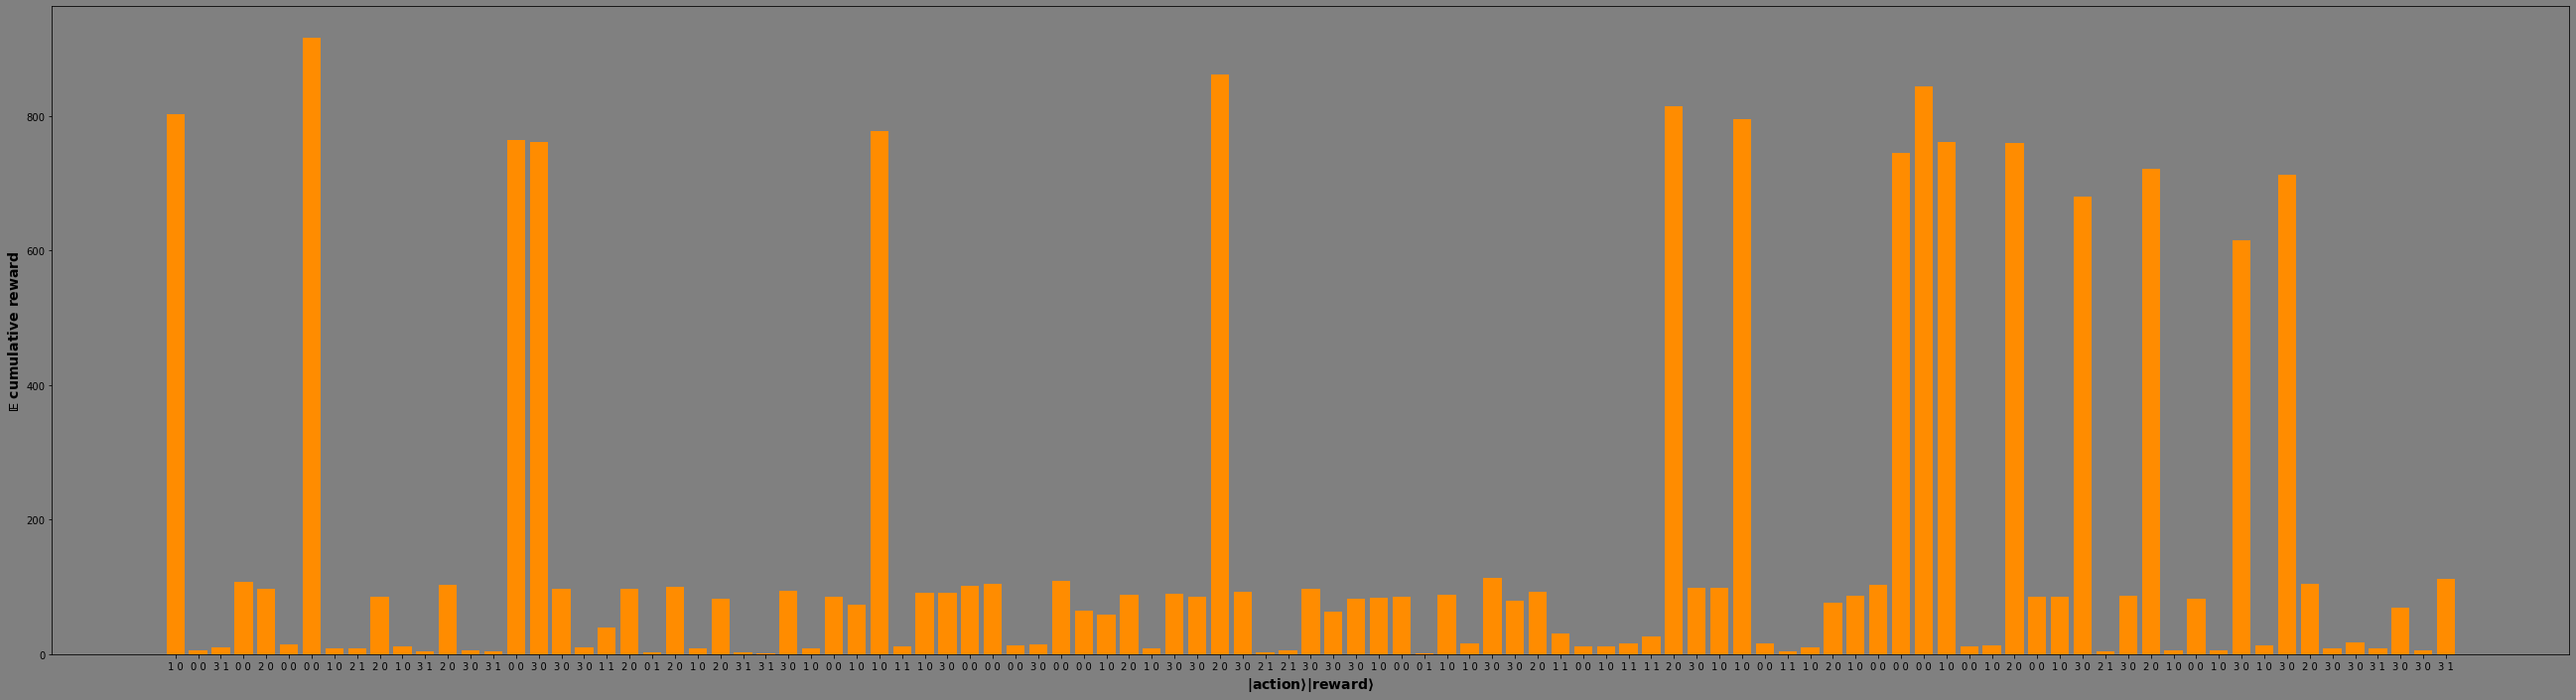

In [6]:
measure, best_action = qmdp.solve(shots=int(avg_k))

### Reward Function normalized to be for T maximum reward transitions at $\pi \over 2$

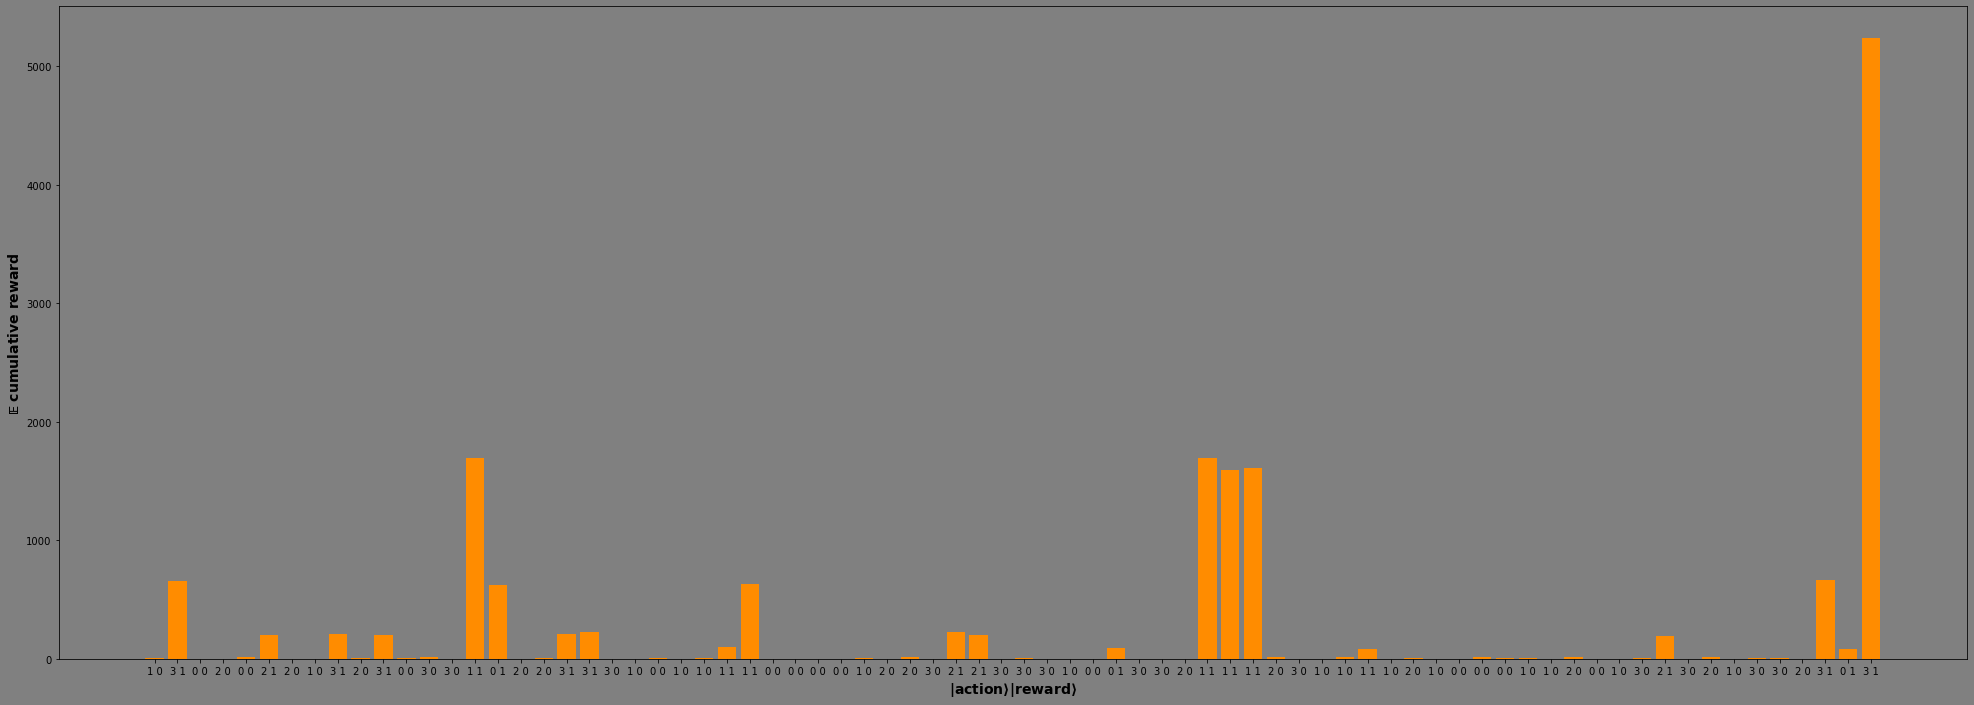

EPSILON BEST ACTION -  3
{'01100100100': 6, '11011101100': 656, '10000100000': 1, '01100111000': 1, '00000000000': 12, '01101011000': 202, '10000111000': 2, '11010100100': 1, '01101001100': 212, '01000011000': 4, '01101111100': 204, '01000110000': 5, '01010111100': 14, '01010011100': 1, '01101000100': 1693, '11011010000': 621, '01100001000': 1, '00000111000': 4, '01101101100': 212, '01101011100': 222, '01000111100': 2, '01010100100': 1, '01000010000': 3, '10000010100': 1, '01100000100': 9, '11011100100': 98, '11011010100': 628, '01000000000': 1, '10000110000': 1, '00000110000': 2, '00010100000': 1, '11010010100': 3, '01000001000': 2, '00000101000': 13, '01100001100': 1, '01101001000': 227, '01101111000': 197, '10000011100': 1, '11010111100': 3, '01010101100': 1, '01000110100': 2, '11010010000': 1, '11011100000': 88, '01100101100': 1, '01100011100': 1, '10000101000': 1, '01101110100': 1691, '01101010100': 1592, '01101100100': 1607, '00000001000': 19, '00000101100': 1, '00000000100': 1, 

In [7]:
measure, best_action = qmdp.solve(shots=int(avg_k),amplify=True)
print("EPSILON BEST ACTION - ",best_action)
print(measure)